# Classification

## Overview

Classification is about assigning categories to objects. Consider the following example. 

<img src="images/classification_general.png" alt="Example for Classification" style="width: 500px;"/>

We have two images, one shows a whale in the sea in front of an iceberg, the other shows a bear in the woods. When we look at these pictures, we immediately see this, because we instinctively assign these categories to the images. Classification is a less powerful approximation of what we instinctively do. The main difference is that we need to work with a fixed and known set of categories. For example, our categories could be "whale picture", "bear picture", and "other image". The images can then be assigned to one of these three categories. The categories to which classification algorithms assign objects are commonly referred to as *classes*. Categories that are not part of the classes, e.g., if there is water in the image, are ignored. A bit more abstract, classification can be described as follows. 

<img src="images/classification_abstract.png" alt="Classification in general" style="width: 500px;"/>

We have objects for which we know a *concept*. When we apply our concept to the objects, we get the categories. For example, we have a concept that describes whales, which we can apply to images to determine if something is within the category whale. The task of classification algorithms is to derive a hypothesis that we can use to infer the class of objects from their features. Let us consider the features of the whale pictures. 

<img src="images/whale_hypothesis.png" alt="The whale hypothesis" style="width: 500px;"/>

Based on these features, we may derive the following hypothesis: *"Objects with fins, an oval general shape that are black on top and white on the bottom in front of a blue background are whales."* This hypothesis works reasonably well, even though there may also be other objects that fit the description, e.g., a submarine that with a black/white painting. This general approach is used by all classification algorithms. The form of the hypothesis, as well as the way the hypothesis is derived from data depends on the algorithm. 


### The Formal Problem

Formally, we have a set of objects $O = \{object_1, object_2, ...\}$ that may be infinite. Moreover, we have representations of these objects in a feature space $\mathcal{F} \{\phi(o): o \in O\}$ and a finite set of classes $C = \{class_1, ..., class_n\}$. 

The classification is defined by a *target concept* that maps objects to classes, i.e.,  $$h^*: O \to C.$$ The target concept is our ground truth, i.e., a perfect assignment of objects to the classes. Usually, we have no mathematical description for the target concept. For example, there is no such mathematical description for the classification of images as whale pictures and bear pictures. The *hypothesis* maps features to classes $$h: \mathcal{F} \to C.$$ The hypothesis is determined by a classification algorithm algorithm with the goal to approximate the target concept such that $$h^*(o) \approx h(\phi(o)).$$

### Scores

A variant of classification is that the hypothesis computes *scores* for each class $c \in C$. In this case, we a scoring function for each class of the form $$h_c': \mathcal{F} \to \mathbb{R}.$$ Scores are similar to *soft clustering*: instead of deciding for only a single class, the classification determines a value for each class, which we can use to evaluate how certain the algorithm is with the decision for a class. When we want to assign the class based on the scores, we usually just assign the class with the highest score. Thus, we have $$h(x) = \arg\max_{c \in C} h_c'(x)$$ for $x \in \mathcal{F}$. 

Often, the scores are probability distributions, i.e., the scores for each class are in the interval [0,1] and the sum of all scores is 1, i.e., $$\sum_{c \in C} h_c'(x) = 1$ for all $x \in \mathcal{F}.$$ 

### Binary Classification and Thresholds

A special case of classification problems is where we have exactly two classes. While this is a strong restriction, there are many problems that can be solved using binary classification. For example, the prediction if a borrower will pay back money, the prediction if a transaction is fraudulent, or the prediction of whether an email is spam or not. 

For binary classification, we usually say that one class is *positive* and the other class is *negative*. Thus, we have exactly two classes. If we have only two classes $C = \{positive, negative\}$ and the scores, we can calculate the score of one class based on the score of the other class, in case the scores a probability distribution, i.e., $$h_{negative}'(x) = 1-h_{positive}'(x)$$ because the sum of the probabilities is one. Because it is sufficient to use the scoring function for the $positive$, we use the notation $h'(x) = h_{positive}$ for binary classification. In this case, we can also use a *threshold* $t \in [0,1]$ to determine the classes from the scoring function instead of just taking the class with the highest score. If $h'(x) \geq t$, $x$ is positive, if the score is less than the threshold it is negative, i.e., 
$$h_t(x) = \cases{ positive & if $h'(x) \geq t$ \\ negative & if $h' < t$ }$$

Why thresholds and scoring functions are important for classification is best demonstrated through an example. The histogram below shows the scores of instances of a spam detection simulation where positive means that an email is spam. 

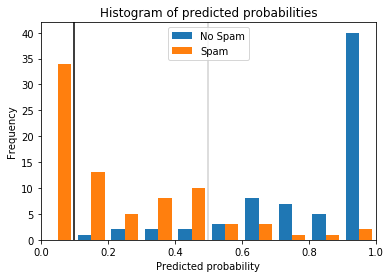

In [7]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# generate sample data
X, y = make_blobs(n_samples=300, centers=2, center_box=(0, 1),
                  cluster_std=0.3, random_state=1)

# split the data into 50% training data and 50% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# predict scores with a random forest
classifier = RandomForestClassifier()
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

plt.figure()
plt.hist([y_score[y_test==1,1], y_score[y_test==0,1]], bins=10, label=['No Spam', 'Spam'])
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')
plt.axvline(0.5, color='lightgray')
plt.axvline(0.1, color='black')
plt.legend(loc="upper center")
plt.show()

The orange bars show the scores of spam emails, the blue bars the scores of other emails. Without picking a specific threshold, we would just predict the class with the highest score. This is the same as a threshold of 0.5, indicated by the gray line. This would mean that most emails would be predicted correctly but there would be some emails that would not be flagged as spam, even though they are, and some emails that are flagged as spam, even though they are not. These are different types of errors, and they are not equal in this use case. While spam is annoying, deletion of the spam emails is not a lot of effort, unless there are hundreds of spam emails. On the other hand, even a single email that is mistakenly flagged as spam and not shown to the recipient can have strong negative consequences. We can solve this problem by picking a suitable threshold. The black line indicates a threshold of 0.1. With this threshold, only spam emails would be flagged as spam. While more spam emails would not be detected, at least all normal emails would pass through the spam filter. Thus, classification with scoring and a suitable threshold can make the difference between solving a problem and building a model that is unsuitable for the use case.  

## Performance Metrics

The key question of classification is how good the hypothesis $h$ approximates the target concept $h^*$. Usually, we do not get perfect solution, which means that there are some instances that are predicted incorrectly by the hypothesis. The spam example above already demonstrates that there are different kinds of mistakes. The basis for any performance evaluation of classification models is the use test data. The hypothesis is applied to the features of the test data. From this, we get a prediction result we can compare with actual classes. The following table shows the five features of two instances of our image classification example, the actual class, and the prediction. 

| shape | top color | bottom color | background color | has fins | class | prediction |
|-------|-----------|--------------|------------------|----------|-------|------------|
| oval  | black     | black        | blue             | true     | whale | whale      |
| rectangle | brown | brown        | green            | false    | bear  | whale      |
| ...   | ...       | ...          | ...              | ...      | ...   | ...        |

The first instance is predicted correctly, the prediction of the second instance is incorrect. If there are thousands or even millions of instance in the test data, we cannot evaluate the prediction by looking at such a table. Instead, we need to summarize the comparison between the classes and the prediction. 

### The Confusion Matrix

The most important tool for the analysis of the quality of hypothesis is the *confusion matrix*, a tabular description of how often the hypothesis is correct and how often it is incorrect, i.e., confused. The confusion matrix four our image classification example may look like this. 

<table>
    <tr><td rowspan=5><br><br><b>Predicted class</b></td><td></td><td colspan=2><b>Actual class</b></td><td></td></tr>
    <tr><td><td><b>whale</b></td><td><b>bear</b></td><td><b>other</b></td></tr>
    <tr><td><b>whale</b></td><td>29</td><td>1</td><td>3</td></tr>
    <tr><td><b>bear</b></td><td>2</td><td>22</td><td>13</td></tr>
    <tr><td><b>other</b></td><td>4</td><td>11</td><td>51</td></tr>
</table>

The confusion matrix basically counts how often each instance of each class is predicted as which class. For example, how often whales are predicted as whales, how often they are predicted as bears, and how often they are predicted as something else. The columns are the actual values of the classes, i.e., the target concept. The rows are the predicted values, i.e., the hypothesis. In the example, we have 35 actual pictures of whales. This is the sum of the values in the first row. 29 of these whale pictures are predicted correctly, 2 are incorrectly predicted as bears, 4 are incorrectly predicted as something else. Thus, the confusion matrix gives us detailed statistical information about how many instances we have and how they are predicted. Values on the diagonal of the confusion matrix are the correct prediction, the other values show incorrect predictions. 

### The Binary Confusion Matrix

The binary confusion matrix is the special case of the confusion matrix for binary classification problems with the classes true and false. In general, the binary confusion matrix looks like this. 

<table>
    <tr><td rowspan=4><br><br><b>Predicted class</b></td><td colspan=2><b>Actual class</b></td><td></td></tr>
    <tr><td><td><b>true</b></td><td><b>false</b></td></tr>
    <tr><td><b>true</b></td><td>true positive (TP)</td><td>false positive (FP)</td></tr>
    <tr><td><b>false</b></td><td>false negative (FN)</td><td>true negative (TN)</td></tr>
</table>

Thus, we have actually positive and negative classes and depending on whether the prediction is correct or not, we get true positives (TP), true negatives (TN), false positives (FP), or false negatives (FN). The binary confusion matrix is well known and not only used for the evaluation of machine learning, but also, e.g., in medical studies to evaluate the quality of tests. From medical studies also originate the terms *type I error* and *type II Error*. The type I error are the false positives. In medicine, this could mean a mistakenly positive result of an antibody test for an illness that may lead to the wrong conclusion that a person as antibodies for the illness. The type II errors are the false negatives. In medicine, this could mean a mistakenly negative result of an antibody test with the wrong conclusion that there are no antibodies. In the spam example, emails mistakenly flagged as spam would be false positives, the spam emails that are missed would be false negatives. 

### Binary Performance Metrics

We can define performance metrics that summarize aspects of the performance of a hypothesis in a single statistical marker. There are many different performance metrics that all measure different aspects of the performance. The table below lists eleven such metrics. 

| Metric | Description | Definition |
|--------|-------------|------------|
| True positive rate, recall, sensitivity | Percentage of positive instances that are predicted correctly. | $TPR = \frac{FP}{TP+FN}$ |
| False negative rate, specificity | Percentage of negative instances that are predicted correctly. | $TNR = \frac{TN}{TN+FP}$ |
| False negative rate | Percentage of positive instances that are predicted incorrectly as negative. | $TNR = \frac{FN}{FN+TP}$ |
| False positive rate | Percentage of negative values that are predicted incorrectly as positive. | $FPR = \frac{FP}{FP+TN}$ |
| Positive predictive value, precision | Percentage of positive predictions that are predicted correctly. | $PPV = \frac{TP}{TP+FP}$ |
| Negative predictive value | Percentage of negative predictions that are predicted correctly. | $NPV = \frac{TN}{TN+FN}$ |
| False discovery rate | Percentage of positive predictions that are predicted incorrectly because they should be negative. |$FDR = \frac{FP}{TP+FP}$ |
| False omission rate | Percentage of negative predictions that are predicted incorrectly because they should be positive. | $FOR = \frac{FN}{FN+TN}$ |
| Accuracy | Percentage of correct predictions. | $accuracy = \frac{TP+TN}{TP+TN+FP+FN}$ |
| F1 measure | Harmonic mean of precision and recall. | $F_1 = 2\cdot\frac{precision \cdot recall}{precision+recall}$ |
| Matthews correlation coefficient (MCC) | Correlation between the prediction and the actual values. | $MCC = \frac{TP\cdot TN - FP\cdot FN}{\sqrt{(TP+FP)(FP+FN)(TN+FP)(TN+FN)}}$ |



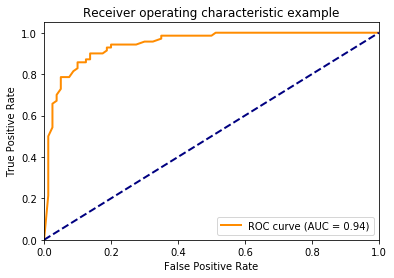

In [12]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _= roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve with AUC
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## $k$-Nearest Neighbor

## Decision Trees

## Random Forests

## Logistic Regression

## Naive Bayes

## Support Vector Machines

## Neural Networks

## Comparison of Classification Models